In [1]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
def load_images_from_folder(folder, num=0):
    """
    This function loads images from the folder and returns a list of images

    Arguments:
    folder: a string containing the name of the folder to load images from 

    Outputs:
    images: list of all images in the folder
    """

    images = []
    count = 0
    for filename in os.listdir(folder):
        count = count+1
        if num>0 and count>num:
            break
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
images = load_images_from_folder("unlabeled_images", 100)

In [4]:
print(np.asarray(images).shape)

(100, 96, 96, 3)


In [5]:
def blur_images(images):
    """
    This function takes a list of images and returns a list of blurred images.
    
    Arguments:
    images: List of original images
    
    Output:
    blur_images: list of blurred images
    """
    blur_images = []
    for im in images:
        rand = random.randint(1,10)
        blur = cv2.blur(im, (rand,rand),0)
        blur_images.append(blur)
        
    return blur_images

In [6]:
blur_im = blur_images(images)

In [7]:
print(np.asarray(blur_im).shape)

(100, 96, 96, 3)


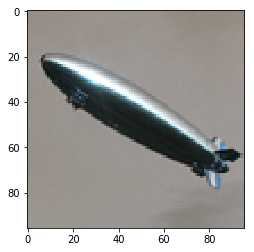

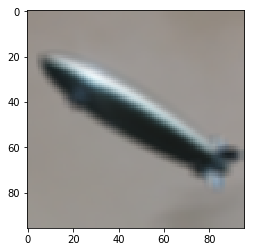

In [11]:
plt.imshow(images[0])
plt.show()
plt.imshow(blur_im[0])
plt.show()

In [14]:
def create_training_dev_set(folder,size_train, size_dev):
    """
    This function loads images from the folder and the training and dev set of required size

    Arguments:
    folder: a string containing the name of the folder to load images from 
    size_train: number of samples needed in the training set
    size_dev: number of samples needed in the dev set
    
    Outputs:
    X_train: list of training blur images
    Y_train: list of training clear images
    X_dev: list of dev blur images
    Y_dev: list of dev clear images
    """
    images = load_images_from_folder(folder, size_train + size_dev)
    blur = blur_images(images)
    
    if size_train+size_dev != np.asarray(images).shape[0]:
        size_train = 0.8 * np.asarray(images).shape[0]
    X_train = blur[0:size_train]
    Y_train = images[0:size_train]
    X_dev = blur[size_train:]
    Y_dev = images[size_train:]
    
    return X_train, Y_train, X_dev, Y_dev


In [15]:
X_train, Y_train, X_dev, Y_dev = create_training_dev_set('unlabeled_images', 200,100)
print(np.asarray(X_train).shape)
print(np.asarray(Y_train).shape)
print(np.asarray(X_dev).shape)
print(np.asarray(Y_dev).shape)

(200, 96, 96, 3)
(200, 96, 96, 3)
(100, 96, 96, 3)
(100, 96, 96, 3)
